In [99]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [100]:
DATASET = "census" #wine
PLOT_FILE = "../plots/plot_"+DATASET+".csv"

# Load evaluation results

In [101]:
eval_df = pd.read_csv(PLOT_FILE, sep=",")
eval_df.rename(columns={
    "Roc Auc": "ROC AUC", 
    "Roc Auc Uma": "ROC AUC Under Attack",
    "Log Loss Uma": "Log Loss Under Attack",
    "Binary Err Rate Uma": "Binary Err Rate Under Attack",
    "F1 Uma": "F1 Under Attack"
}, inplace=True)

In [102]:
eval_df

Model  Budget  Log Loss  Binary Err Rate        F1  \
0                Baseline [GBDT]       0  0.300081         0.137866  0.802092   
1     Adversarial-Boosting [b=5]       0  0.317257         0.144168  0.773609   
2    Adversarial-Boosting [b=15]       0  0.318171         0.144610  0.771476   
3   Adversarial-Boosting [b=150]       0  0.318685         0.144831  0.770835   
4   Adversarial-Boosting [b=300]       0  0.318377         0.144500  0.770922   
5          Non-Interferent [b=5]       0  0.292658         0.133444  0.810933   
6         Non-Interferent [b=15]       0  0.292938         0.134218  0.810512   
7        Non-Interferent [b=150]       0  0.293678         0.134881  0.810023   
8        Non-Interferent [b=300]       0  0.292364         0.134107  0.811144   
9                Baseline [GBDT]       5       NaN              NaN       NaN   
10    Adversarial-Boosting [b=5]       5       NaN              NaN       NaN   
11   Adversarial-Boosting [b=15]       5       NaN              NaN       NaN   
12  Adversarial-Boosting [b=150]       5       NaN              NaN       NaN   
13  Adversarial-Boosting [b=300]       5       NaN              NaN       NaN   
14         Non-Interferent [b=5]       5       NaN              NaN       NaN   
15        Non-Interferent [b=15]       5       NaN              NaN       NaN   
16       Non-Interferent [b=150]       5       NaN              NaN       NaN   
17       Non-Interferent [b=300]       5       NaN              NaN       NaN   
18               Baseline [GBDT]      15       NaN              NaN       NaN   
19    Adversarial-Boosting [b=5]      15       NaN              NaN       NaN   
20   Adversarial-Boosting [b=15]      15       NaN              NaN       NaN   
21  Adversarial-Boosting [b=150]      15       NaN              NaN       NaN   
22  Adversarial-Boosting [b=300]      15       NaN              NaN       NaN   
23         Non-Interferent [b=5]      15       NaN              NaN       NaN   
24        Non-Interferent [b=15]      15       NaN              NaN       NaN   
25       Non-Interferent [b=150]      15       NaN              NaN       NaN   
26       Non-Interferent [b=300]      15       NaN              NaN       NaN   
27               Baseline [GBDT]     150       NaN              NaN       NaN   
28    Adversarial-Boosting [b=5]     150       NaN              NaN       NaN   
29   Adversarial-Boosting [b=15]     150       NaN              NaN       NaN   
30  Adversarial-Boosting [b=150]     150       NaN              NaN       NaN   
31  Adversarial-Boosting [b=300]     150       NaN              NaN       NaN   
32         Non-Interferent [b=5]     150       NaN              NaN       NaN   
33        Non-Interferent [b=15]     150       NaN              NaN       NaN   
34       Non-Interferent [b=150]     150       NaN              NaN       NaN   
35       Non-Interferent [b=300]     150       NaN              NaN       NaN   
36               Baseline [GBDT]     300       NaN              NaN       NaN   
37    Adversarial-Boosting [b=5]     300       NaN              NaN       NaN   
38   Adversarial-Boosting [b=15]     300       NaN              NaN       NaN   
39  Adversarial-Boosting [b=150]     300       NaN              NaN       NaN   
40  Adversarial-Boosting [b=300]     300       NaN              NaN       NaN   
41         Non-Interferent [b=5]     300       NaN              NaN       NaN   
42        Non-Interferent [b=15]     300       NaN              NaN       NaN   
43       Non-Interferent [b=150]     300       NaN              NaN       NaN   
44       Non-Interferent [b=300]     300       NaN              NaN       NaN   

     ROC AUC  Log Loss Under Attack  Binary Err Rate Under Attack  \
0   0.916728                    NaN                           NaN   
1   0.913199                    NaN                           NaN   
2   0.913467                    NaN                           NaN   
3   0.913253            

# Plot data

In [ ]:
#_ = sns.set(style="darkgrid")

In [105]:
def bar_plot_under_attack(df, metric, train_budget):
    models = ["Baseline [GBDT]", 
              "SVM",
              "Adversarial-Boosting [b={}]".format(train_budget), 
              "Non-Interferent [b={}]".format(train_budget)]
    models = ["Baseline [GBDT]", 
              "Adversarial-Boosting [b={}]".format(train_budget), 
              "Non-Interferent [b={}]".format(train_budget)]
    
    data = df[df["Model"].isin(models)].filter(regex=("Model|Budget|"+metric+"*"))
    return data
    
#     fig, ax = plt.subplots(1, 1, figsize=(12,8))
#     for c in data.columns.tolist()[1:]:
#         _ = sns.barplot(x="Model", y=c, hue="Model", data=data, ax=ax)
    

In [108]:
data = bar_plot_under_attack(eval_df, "F1", 150)
data

Model  Budget        F1  F1 Under Attack
0                Baseline [GBDT]       0  0.802092              NaN
3   Adversarial-Boosting [b=150]       0  0.770835              NaN
7        Non-Interferent [b=150]       0  0.810023              NaN
9                Baseline [GBDT]       5       NaN         0.782680
12  Adversarial-Boosting [b=150]       5       NaN         0.769826
16       Non-Interferent [b=150]       5       NaN         0.792774
18               Baseline [GBDT]      15       NaN         0.775033
21  Adversarial-Boosting [b=150]      15       NaN         0.769448
25       Non-Interferent [b=150]      15       NaN         0.783336
27               Baseline [GBDT]     150       NaN         0.762261
30  Adversarial-Boosting [b=150]     150       NaN         0.767566
34       Non-Interferent [b=150]     150       NaN         0.769863
36               Baseline [GBDT]     300       NaN         0.754493
39  Adversarial-Boosting [b=150]     300       NaN         0.761362
43       Non-Interferent [b=150]     300       NaN         0.762200

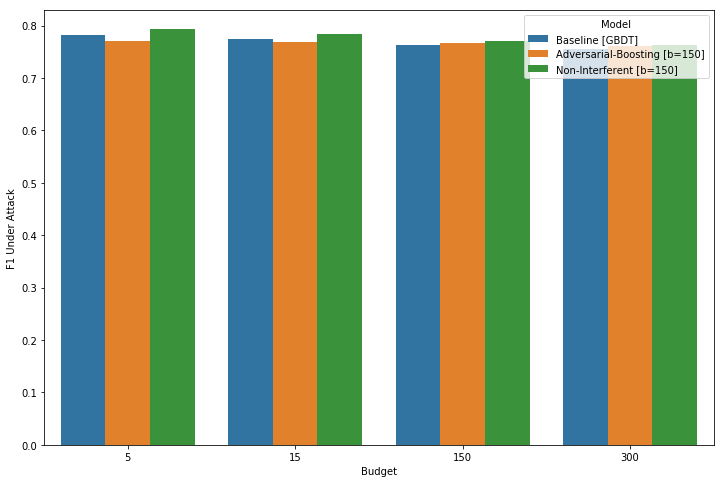

In [112]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))

_ = sns.barplot(x="Budget", y="F1 Under Attack", hue="Model", data=data[data.Budget > 0], ax=ax)

In [ ]:
def plot_data(df, x="N. of Trees", y="ROC AUC Under Max Attack", hue="Model"):
    fig, ax = plt.subplots(1, 1, figsize=(12,8))
    _ = sns.pointplot(x=x, y=y, hue=hue, data=df, ax=ax, palette="Spectral", 
                      markers=['s', '*', '*', '*', '*', '*', '*', 'o'], 
                      linestyles=['-', '-', '-', '-', '-', '-', '-', '-']
                     )
#     _ = sns.pointplot(x=x, y="ROC AUC", hue=hue, data=df, ax=ax, palette="Spectral", 
#                       markers=['s', '*', '*', '*', '*', '*', '*', 'o'], 
#                       linestyles=['-', '-', '-', '-', '-', '-', '-', '-']
#                      )
    _ = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
plot_data(eval_df)

# Figure 1

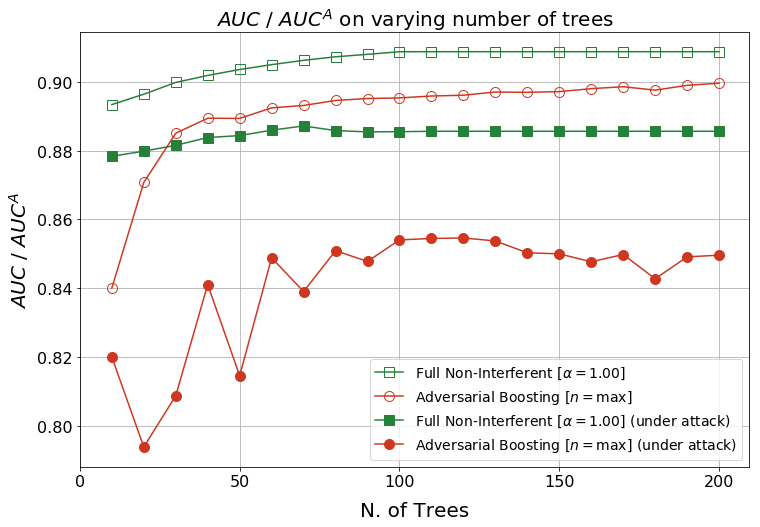

In [21]:
# Figure
plt.figure(figsize=(12,8))

# sns.pointplot(x="N. of Trees", y="ROC AUC Under Max Attack", hue="Model", 
#                   data=eval_df, ax=ax, palette="OrRd", 
#                   markers=['s', '*', '*', '*', '*', '*', '*', 'o'], 
#                   linestyles=['-', '-', '-', '-', '-', '-', '-', '-']
#                  )

################## ROC AUC ##################

plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Full-Non-Interferent"], 
         eval_df["ROC AUC"][eval_df['Model']=="Full-Non-Interferent"], 
         color='#258039', marker='s', ms=10, mfc='None', label=r"Full Non-Interferent [$\alpha=1.00$]")

# plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.50]"], 
#          eval_df["ROC AUC"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.50]"], 
#          color='#31a9b8', marker='x', ms=10, mfc='None', label="Weighted-Non-Interferent [alpha=0.50]")

# plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.10]"], 
#          eval_df["ROC AUC"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.10]"], 
#          color='#f5be41', marker='D', ms=10, mfc='None', label="Weighted-Non-Interferent [alpha=0.10]")

plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Baseline [p=1.0; n=max]"], 
         eval_df["ROC AUC"][eval_df['Model']=="Baseline [p=1.0; n=max]"], 
         color='#cf3721', marker='o', ms=10,  mfc='None', label=r"Adversarial Boosting [$n = \max$]")

################## ROC AUC Under Max Attack ##################

plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Full-Non-Interferent"], 
         eval_df["ROC AUC Under Max Attack"][eval_df['Model']=="Full-Non-Interferent"], 
         color='#258039', marker='s',  ms=10,  label=r"Full Non-Interferent [$\alpha=1.00$] (under attack)")

# plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.50]"], 
#          eval_df["ROC AUC Under Max Attack"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.50]"], 
#          color='#31a9b8', marker='x', ms=10,  label="Weighted-Non-Interferent [alpha=0.50] (under attack)")

# plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.10]"], 
#          eval_df["ROC AUC Under Max Attack"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.10]"], 
#          color='#f5be41', marker='D',  ms=10,  label="Weighted-Non-Interferent [alpha=0.10] (under attack)")

plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Baseline [p=1.0; n=max]"], 
         eval_df["ROC AUC Under Max Attack"][eval_df['Model']=="Baseline [p=1.0; n=max]"], 
         color='#cf3721', marker='o',  ms=10, label=r"Adversarial Boosting [$n = \max$] (under attack)")


#plt.xlim([0,210])
plt.xticks(range(0,210,50))

plt.legend(loc="best", borderaxespad=0.5, fontsize=14) #bbox_to_anchor=(1.05, 1), loc=2
plt.title("$AUC$ / $AUC^A$ on varying number of trees", fontsize=20)
plt.xlabel("N. of Trees", fontsize=20, labelpad=12)
plt.ylabel("$AUC$ / $AUC^A$", fontsize=20, labelpad=6)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
plt.grid()
plt.savefig(ATTACKER+"_roc_auc_trees.pdf")

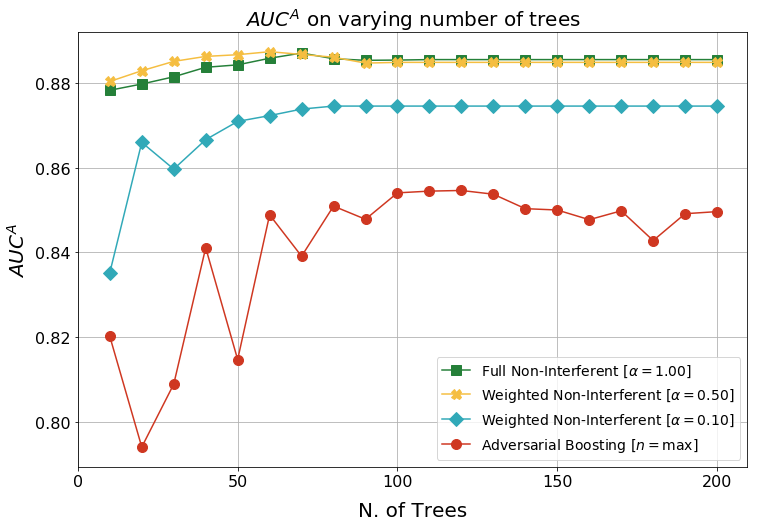

In [24]:
# Figure
plt.figure(figsize=(12,8))

# sns.pointplot(x="N. of Trees", y="ROC AUC Under Max Attack", hue="Model", 
#                   data=eval_df, ax=ax, palette="OrRd", 
#                   markers=['s', '*', '*', '*', '*', '*', '*', 'o'], 
#                   linestyles=['-', '-', '-', '-', '-', '-', '-', '-']
#                  )

################## ROC AUC ##################

# plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Full-Non-Interferent"], 
#          eval_df["ROC AUC"][eval_df['Model']=="Full-Non-Interferent"], 
#          color='#258039', marker='s', ms=10, mfc='None', label=r"Full Non-Interferent [$\alpha=1.00$]")

# plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.50]"], 
#          eval_df["ROC AUC"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.50]"], 
#          color='#f5be41', marker='X', ms=10, mfc='None', label=r"Weighted Non-Interferent [$\alpha=0.50$]")

# plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.10]"], 
#          eval_df["ROC AUC"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.10]"], 
#          color='#31a9b8', marker='D', ms=10, mfc='None', label=r"Weighted Non-Interferent [$\alpha=0.10$]")

# plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Baseline [p=1.0; n=max]"], 
#          eval_df["ROC AUC"][eval_df['Model']=="Baseline [p=1.0; n=max]"], 
#          color='#cf3721', marker='o', ms=10,  mfc='None', label=r"Adversarial Boosting [$n = \max$]")

################## ROC AUC Under Max Attack ##################

plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Full-Non-Interferent"], 
         eval_df["ROC AUC Under Max Attack"][eval_df['Model']=="Full-Non-Interferent"], 
         color='#258039', marker='s',  ms=10,  label=r"Full Non-Interferent [$\alpha=1.00$]")

plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.50]"], 
         eval_df["ROC AUC Under Max Attack"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.50]"], 
         color='#f5be41', marker='X', ms=10,  label=r"Weighted Non-Interferent [$\alpha=0.50$]")

plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.10]"], 
         eval_df["ROC AUC Under Max Attack"][eval_df['Model']=="Weighted-Non-Interferent [alpha=0.10]"], 
         color='#31a9b8', marker='D',  ms=10,  label=r"Weighted Non-Interferent [$\alpha=0.10$]")

plt.plot(eval_df["N. of Trees"][eval_df['Model']=="Baseline [p=1.0; n=max]"], 
         eval_df["ROC AUC Under Max Attack"][eval_df['Model']=="Baseline [p=1.0; n=max]"], 
         color='#cf3721', marker='o',  ms=10, label=r"Adversarial Boosting [$n = \max$]")


#plt.xlim([0,210])
plt.xticks(range(0,210,50))

plt.legend(loc="best", borderaxespad=0.5, fontsize=14) #bbox_to_anchor=(1.05, 1), loc=2
plt.title("$AUC^A$ on varying number of trees", fontsize=20)
plt.xlabel("N. of Trees", fontsize=20, labelpad=12)
plt.ylabel("$AUC^A$", fontsize=20, labelpad=6)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
plt.grid()
plt.savefig(ATTACKER+"_roc_auc_trees_alpha.pdf")
#plt.savefig("unattacked_roc_auc_trees_alpha.pdf")

# Table 1

In [ ]:
def clean_df (eval_df):

    eval_df.rename(columns={
    "Roc Auc": "ROC AUC", 
    "Roc Auc Uma": "ROC AUC Under Max Attack",
    "Log Loss Uma": "Log Loss Under Max Attack",
    "Binary Err Rate Uma": "Binary Err Rate Under Max Attack"
    }, inplace=True)
    
    eval_df = eval_df[(eval_df['Model']=="Standard") |
                      (eval_df['Model']=="Baseline [p=1.0; n=max]") |
                      (eval_df['Model']=="Baseline [p=1.0; n=1]") |
                      (eval_df['Model']=="SVM [C=0.1]") |
                      (eval_df['Model']=="Weighted-Non-Interferent [alpha=0.10]") |
                      (eval_df['Model']=="Weighted-Non-Interferent [alpha=0.50]") |
                      (eval_df['Model']=="Full-Non-Interferent")
                      ]

    eval_df = eval_df[(eval_df['N. of Trees']==0) | (eval_df['Model'] == 'SVM [C=0.1]')]

    eval_df["e-ROC"] = eval_df["ROC AUC"] - eval_df["ROC AUC Under Max Attack"] 
    eval_df["e-LogLoss"] = - eval_df["Log Loss"] + eval_df["Log Loss Under Max Attack"] 
    
    return eval_df

weak_df = clean_df( pd.read_csv("../plots/weak.csv", sep=",") )
display(weak_df)

strong_df = clean_df( pd.read_csv("../plots/strong.csv", sep=",") )
display(strong_df)

In [ ]:
weak_df['Model'].unique()

In [ ]:
row_map = {"Standard":"GBDT", 
           "Baseline [p=1.0; n=1]":"Adv. Boosting [n=1]", 
           "Baseline [p=1.0; n=max]":"Adv. Boosting [n=max]", 
           "SVM [C=0.1]": "SVM",
           "Weighted-Non-Interferent [alpha=0.10]": "Weighted-Non-Interferent [alpha=0.10]",
           "Weighted-Non-Interferent [alpha=0.50]": "Weighted-Non-Interferent [alpha=0.50]",
           "Full-Non-Interferent": "Full-Non-Interferent [alpha=1.00]"
          }


for row in list(row_map.keys()):
    print (row_map[row], end="\t")
    for col in ["Log Loss", "Log Loss Under Max Attack", "e-LogLoss"]:
        print ( " & %.3f" % weak_df[weak_df['Model']==row][col].values[0], end="") 
    for col in ["Log Loss", "Log Loss Under Max Attack", "e-LogLoss"]:
        print ( " & %.3f" % strong_df[strong_df['Model']==row][col].values[0], end="") 
    print (" \\\\")

for row in list(row_map.keys()):
    print (row_map[row], end="\t")
    for col in ["ROC AUC", "ROC AUC Under Max Attack", "e-ROC"]:
        print ( " & %.3f" % weak_df[weak_df['Model']==row][col].values[0], end="") 
    for col in ["ROC AUC", "ROC AUC Under Max Attack", "e-ROC"]:
        print ( " & %.3f" % strong_df[strong_df['Model']==row][col].values[0], end="") 
    print (" \\\\")
